In [ ]:
pip install google-api-python-client

In [ ]:
from googleapiclient.discovery import build
import seaborn as sns
import pandas as pd

In [ ]:
api_key ='' # get your api key from here
channel_ids =[''] # put your channel ids of he youube channels you want to analyze

youtube =build('youtube','v3',developerKey =api_key)

In [ ]:
def get_channel_stats(youtube, channel_ids):
    all_data = []

    # API request to get channel details
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()

    # Loop through the response to extract relevant details
    for item in response['items']:
        data = {
            'channel_name': item['snippet']['title'],
            'Subscribers': item['statistics']['subscriberCount'],
            'Views': item['statistics']['viewCount'],
            'Total_videos': item['statistics']['videoCount'],
            'playlist_id': item['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)

    return all_data


In [ ]:
channel =get_channel_stats (youtube,channel_ids)



In [ ]:
df =pd.DataFrame(channel)

In [ ]:
df

,channel_name,Subscribers,Views,Total_videos,playlist_id
0,Seattle Data Guy,101000,5349391,274,UUmLGJ3VYBcfRaWbP6JLJcpA
1,Obinna TV Extra,311000,43346777,1069,UU_9xRXWjRrz_Jy7SWhUnBBw
2,Alex The Analyst,882000,40623744,326,UU7cs8q-gJRlGwj4A8OmCmXg
3,MrBeast,320000000,60848792727,822,UUX6OQ3DkcsbYNE6H8uQQuVA
4,3MenArmy Kenya,209000,28153827,854,UUhQXn6sL9ENIpA74qqPG1HA


In [ ]:
df.dtypes

,0
channel_name,object
Subscribers,object
Views,object
Total_videos,object
playlist_id,object


In [ ]:
df['Subscribers'] = df['Subscribers'].astype(int)
df['Views'] = df['Views'].astype(int)
df['Total_videos'] = df['Total_videos'].astype(int)



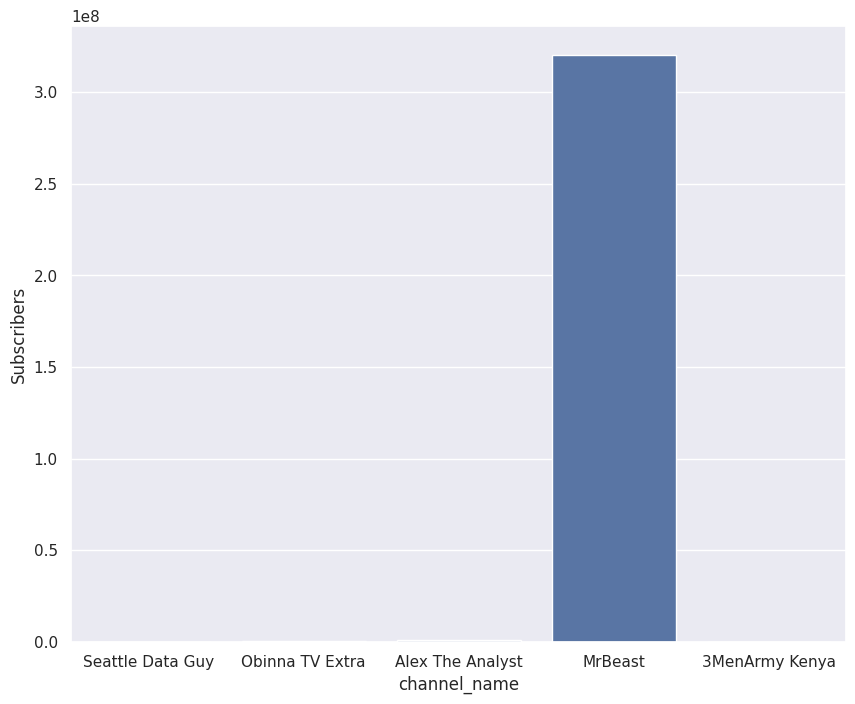

In [ ]:
sns.set(rc ={'figure.figsize':(10,8)})
ax =sns.barplot(x = 'channel_name',y='Subscribers',data =df)

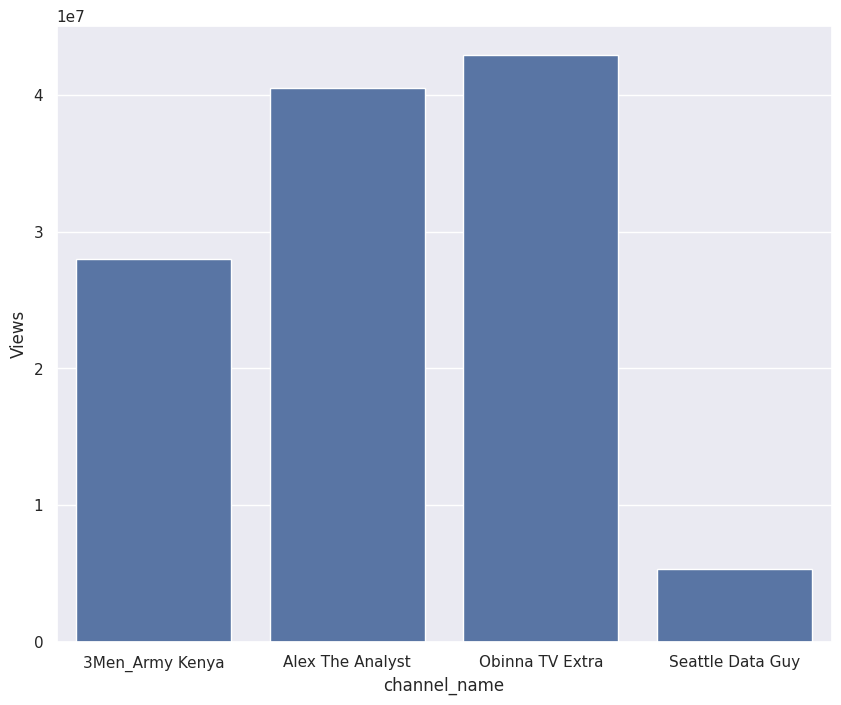

In [ ]:
ax =sns.barplot(x = 'channel_name',y='Views',data =df)

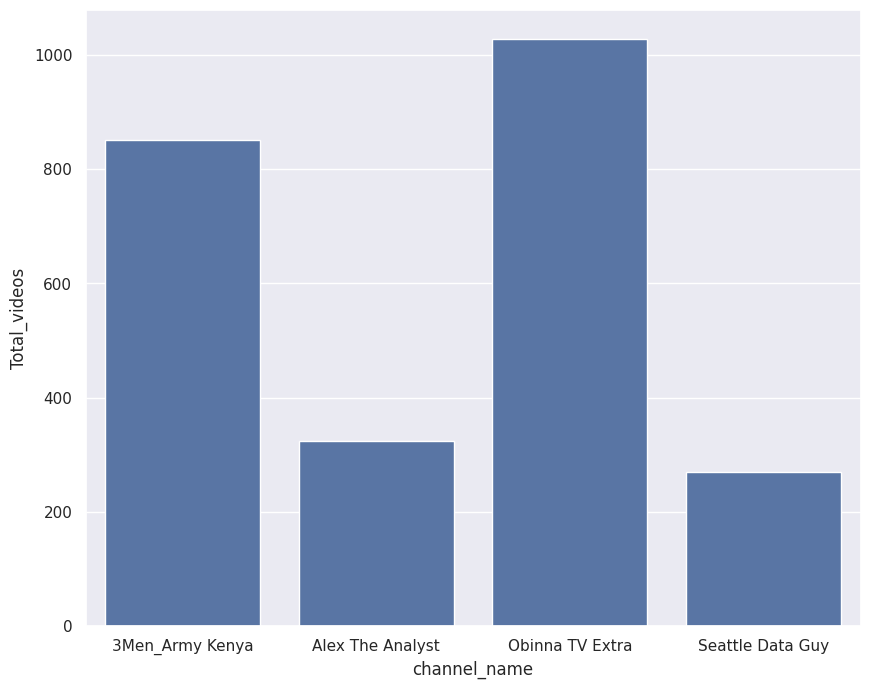

In [ ]:

ax =sns.barplot(x = 'channel_name',y='Total_videos',data =df)

In [ ]:
print(df['channel_name'].unique())


['Seattle Data Guy' 'Obinna TV Extra' 'Alex The Analyst' 'MrBeast'
 '3MenArmy Kenya']


In [ ]:
df.columns

Index(['channel_name', 'Subscribers', 'Views', 'Total_videos', 'playlist_id'], dtype='object')

In [ ]:
playlist_id = df.loc[df['channel_name'] == 'MrBeast', 'playlist_id'].iloc[0]


In [ ]:
playlist_id

'UUX6OQ3DkcsbYNE6H8uQQuVA'

In [ ]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page
            )
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page = response.get('nextPageToken')

    return (video_ids)


In [ ]:
 video_ids =get_video_ids(youtube ,playlist_id)

In [ ]:
video_ids

['YST1sWFPDh4',
 'IURU4S_AWwg',
 'pQMw1T0s3RA',
 'Kkd89J65pCQ',
 'uvACOp4WFR4',
 'VS1-g_B9SWw',
 'sy3g1oKuJrE',
 'powLfaxwp9c',
 'eD-AeRMefiU',
 'dosLbli3-Lk',
 'QST8NGccQsA',
 'yBHL7O_KeSw',
 'saAcEG7gOT0',
 'VUFoHc0YqTI',
 '-pcqMnFJIbM',
 'Liap7rpUI6k',
 'mDLe3qBYSWI',
 'uKLscjh__Yc',
 'XvVmpMdCEMA',
 'n74ke0Wjmi4',
 'ndTvsReGSYk',
 'hnbK_Cmu7Oo',
 'bb7DTqSP7gU',
 '5gTb8Gnz0Z8',
 '9VfdW-cH2gw',
 '6ldUZ4iHxI8',
 'd-hkRgrYG9Q',
 'QKk5LkxcGWA',
 '9CSjgKI363M',
 'KZegxj-Kxco',
 'TskPDG_8mng',
 'rqLbn1PQPKA',
 'Q8Rj-kxKiX0',
 'L48x9mB7wRQ',
 'nB7Lo9pGzVk',
 'UQTuAXmdl4Q',
 'TPTZWGZHI_E',
 'AXpOnpNg3cQ',
 'nhS7KhuNqQU',
 'XYZxufvwC14',
 'Bs6UgJccEoI',
 'gG7upg6QaBI',
 'CoYLtXpAZsU',
 'wvUiRHd47M0',
 '9FVchWw3EbU',
 'Ydm9dyIgimQ',
 'RYjLU2N8K70',
 'nof9jYIhv54',
 'BK0Ni-izQ-A',
 'eZkU9WbH7yw',
 'rZTzl6iUKs4',
 '05qnK0OpOFM',
 'hF5ztrfkYMo',
 'gkKY6Q3GApw',
 'ax5DPeKNUKg',
 'Z8_MHGPKLBU',
 'Tflbt5-K28U',
 'YzORhWjktwY',
 '36yR3FGdGl0',
 'oVKuwk8xY38',
 'CJUYTO3lbTw',
 'Ehqpu8B-QRA',
 'DIh3c3

In [ ]:
def get_video_details(youtube, video_ids):
    all_video_stats = []

    # Process video IDs in batches of 50 (YouTube API limit)
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50])  # Select 50 video IDs at a time
        )
        response = request.execute()

        # Extract video statistics for each video
        for video in response['items']:
            video_stats = {
                'Title': video['snippet']['title'],
                'Published_date': video['snippet']['publishedAt'],

                'Views': video['statistics'].get('viewCount', 0),
                'Likes': video['statistics'].get('likeCount', 0),
                'Dislikes': video['statistics'].get('dislikeCount', 0),
                'Comments': video['statistics'].get('commentCount', 0)
            }
            all_video_stats.append(video_stats)

    return all_video_stats



In [ ]:
video_details=get_video_details(youtube,video_ids)

In [ ]:
video_details=pd.DataFrame(video_details)

In [ ]:
video_details.head(50)

,Title,Published_date,Views,Likes,Dislikes,Comments
0,7 Days Exploring An Underground City,2024-10-12T16:00:00Z,44300433,1870272,0,12697
1,Will A Basketball Boat Hold My Weight?,2024-10-11T16:00:01Z,31145156,1460172,0,2325
2,"Find The Real MrBeast, Win $10,000",2024-10-05T16:00:00Z,96476335,4737704,0,3743
3,How Many Twins Can You Spot?,2024-10-03T18:00:01Z,26663055,1255376,0,2266
4,"Spot The Difference, Win $10,000",2024-09-28T20:00:00Z,82638718,3999080,0,2817
5,"100 Identical Twins Fight For $250,000",2024-09-28T16:00:00Z,91331668,2730423,0,26067
6,Running With Bigger And Bigger Lunchlys,2024-09-20T16:00:00Z,135464725,4761363,0,7244
7,Holding Bigger And Bigger Dogs,2024-09-16T18:00:00Z,82563406,4039974,0,4970
8,"Men Vs Women Survive The Wilderness For $500,000",2024-09-07T16:00:00Z,116248023,3549615,0,48731
9,Will A Guitar Boat Hold My Weight?,2024-09-05T16:00:01Z,303383999,10903363,0,11069


In [ ]:
def get_video_durations(youtube, video_ids):
    video_durations = []

    # YouTube API allows fetching 50 video details at a time
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='contentDetails',
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()

        # Extracting duration for each video
        for video in response['items']:
            video_id = video['id']
            duration = video['contentDetails']['duration']  # ISO 8601 format
            video_durations.append({'video_id': video_id, 'duration': duration})

    return video_durations


In [ ]:
get_video_durations(youtube, video_ids)

[{'video_id': 'bn0Kh9c4Zv4', 'duration': 'PT20M35S'},
 {'video_id': 'dDVFnfCwjHA', 'duration': 'PT30S'},
 {'video_id': 'Kt2HvqRruHQ', 'duration': 'PT37S'},
 {'video_id': 'IHNQhb-mjZc', 'duration': 'PT17S'},
 {'video_id': 'vDrSCXFMAKk', 'duration': 'PT58S'},
 {'video_id': 'snX5YyflrGw', 'duration': 'PT35M40S'},
 {'video_id': 'nbzQdlWrcnk', 'duration': 'PT18S'},
 {'video_id': '8krJy31Diow', 'duration': 'PT17S'},
 {'video_id': 'aRcUVhVlSHg', 'duration': 'PT31M48S'},
 {'video_id': 'Jo7sfpeWqwE', 'duration': 'PT20S'},
 {'video_id': 'QtD-CeUdRUQ', 'duration': 'PT37S'},
 {'video_id': 'ndAQfTzlVjc', 'duration': 'PT17M59S'},
 {'video_id': 'AydS-vA3qa4', 'duration': 'PT17S'},
 {'video_id': 'UPrkC1LdlLY', 'duration': 'PT32M21S'},
 {'video_id': '8bTQMDM4qvY', 'duration': 'PT40S'},
 {'video_id': '4SNThp0YiU4', 'duration': 'PT41M27S'},
 {'video_id': 'XhuisK0bTSA', 'duration': 'PT1M'},
 {'video_id': 'lkCRPp7cnP8', 'duration': 'PT18S'},
 {'video_id': 'KkCXLABwHP0', 'duration': 'PT9M36S'},
 {'video_id'

In [ ]:
import isodate

# Convert ISO 8601 duration to minutes
def convert_duration_to_minutes(duration):
    duration_obj = isodate.parse_duration(duration)
    return round(duration_obj.total_seconds() / 60, 2)

# Fetch video details and durations
def get_video_details_and_durations(youtube, video_ids):
    all_video_stats = []

    # Fetch video details in chunks of 50 (API limit)
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics,contentDetails',
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()

        # Iterate over the video items and extract necessary information
        for video in response['items']:
            title = video['snippet']['title']
            published_date = video['snippet']['publishedAt']

            views = video['statistics'].get('viewCount', '0')
            likes = video['statistics'].get('likeCount', '0')
            dislikes = video['statistics'].get('dislikeCount', '0')
            comments = video['statistics'].get('commentCount', '0')
            duration_iso = video['contentDetails']['duration']

            # Convert ISO 8601 duration to minutes
            duration_in_minutes = convert_duration_to_minutes(duration_iso)

            # Collect video statistics
            video_stats = {
                'Title': title,
                'Published_date': published_date,

                'Views': views,
                'Likes': likes,
                'Dislikes': dislikes,
                'Comments': comments,
                'Duration (Minutes)': duration_in_minutes
            }
            all_video_stats.append(video_stats)

    return all_video_stats



In [ ]:
pip install isodate


In [ ]:
video_data =get_video_details_and_durations(youtube, video_ids)

In [ ]:
video_df =pd.DataFrame(video_data)

In [ ]:
video_df.head(50)

,Title,Published_date,Views,Likes,Dislikes,Comments,Duration (Minutes)
0,7 Days Exploring An Underground City,2024-10-12T16:00:00Z,44333534,1870584,0,12707,20.58
1,Will A Basketball Boat Hold My Weight?,2024-10-11T16:00:01Z,31145156,1460592,0,2325,0.50
2,"Find The Real MrBeast, Win $10,000",2024-10-05T16:00:00Z,96480641,4737770,0,3743,0.62
3,How Many Twins Can You Spot?,2024-10-03T18:00:01Z,26663663,1255386,0,2266,0.28
4,"Spot The Difference, Win $10,000",2024-09-28T20:00:00Z,82638718,3999128,0,2817,0.97
5,"100 Identical Twins Fight For $250,000",2024-09-28T16:00:00Z,91331668,2730437,0,26067,35.67
6,Running With Bigger And Bigger Lunchlys,2024-09-20T16:00:00Z,135464725,4761386,0,7244,0.30
7,Holding Bigger And Bigger Dogs,2024-09-16T18:00:00Z,82563696,4040152,0,4970,0.28
8,"Men Vs Women Survive The Wilderness For $500,000",2024-09-07T16:00:00Z,116249091,3549622,0,48731,31.80
9,Will A Guitar Boat Hold My Weight?,2024-09-05T16:00:01Z,303383999,10903549,0,11069,0.33


In [ ]:
video_df.shape

(822, 7)